# Chapter 4

In this chapter, we will start to create predictor algorithms using statistical methods. We will create a regression algorithm and make predictions then we will make statistics on our earnings

###### Summary
- Librairies
- Data import
- Set of data
- Linear Regression
- predictions
- Visualization
- Earnings
- Statistics

In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###### Data import

for personnal key : https://www.alphavantage.co/support/#api-key

In [2]:
from alpha_vantage.timeseries import TimeSeries
key = 'Your personnal key'
ts = TimeSeries(key, output_format='pandas')
amzn, _ = ts.get_daily(symbol="AMZN", outputsize='full')
amzn.columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
amzn = amzn.sort_index(axis=0, ascending=True)

In [3]:
amzn = amzn[['OPEN', 'HIGH', 'LOW', 'CLOSE']].pct_change(1).dropna()
amzn

,OPEN,HIGH,LOW,CLOSE
date,,,,
2000-03-31,0.034884,-0.003710,-0.015625,0.007519
2000-04-03,-0.019625,-0.021451,-0.015873,-0.051343
2000-04-04,-0.039120,-0.003806,-0.100806,0.005979
2000-04-05,-0.017971,-0.007641,0.085202,-0.027369
2000-04-06,0.027368,0.008623,0.022810,0.033124
...,...,...,...,...
2020-03-25,-0.016045,-0.002425,-0.007662,-0.027968
2020-03-26,-0.009731,0.003194,0.001861,0.036933
2020-03-27,0.015174,-0.008536,0.005626,-0.028325


##### Set of data

In [4]:
a = 3860
l = len(amzn)


X_train = amzn.iloc[0:a-1,:].values
X_visu = amzn.iloc[a:l-1,:].values

y_train = amzn[["CLOSE"]].iloc[1:a,:].values
y_visu = amzn[["CLOSE"]].iloc[a+1:l,:].values

##### Linear Regression 
The objective of a regression in statistics and to be able to predict the behavior of a variable based on other variables. Here, with the X the regression tries to predict the behavior of y. Thus, we try to predict the future price of an asset using OHLCV data.


```price(t+1)  = x1 * Open(t) + x2 * High(t) + x3 * Low(t) + x4 * Close(t) + x5 * Volume(t) ```


The objective of regression is to find the vector of coefficient X which will make the equation the most precise.

In [5]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Prévision

In [6]:
y_pred = rl.predict(X_visu)

In [7]:
y_pred

array([[0.0012342 ],
       [0.00071127],
       [0.00218318],
       ...,
       [0.00010004],
       [0.00164422],
       [0.00098407]])

In [8]:
pds.DataFrame(y_pred)

,0
0,0.001234
1,0.000711
2,0.002183
3,0.001054
4,-0.000272
...,...
1165,-0.000480
1166,0.003388
1167,0.000100
1168,0.001644


##### Visualization

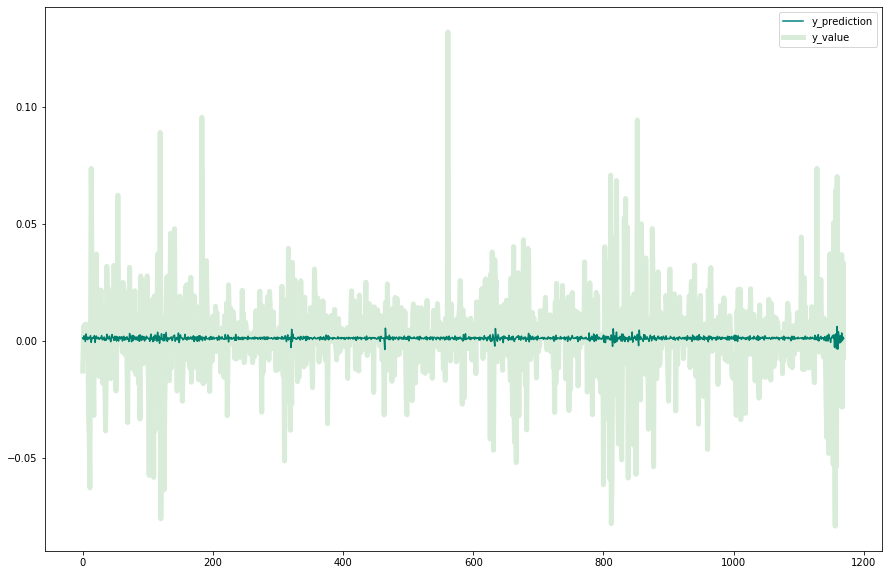

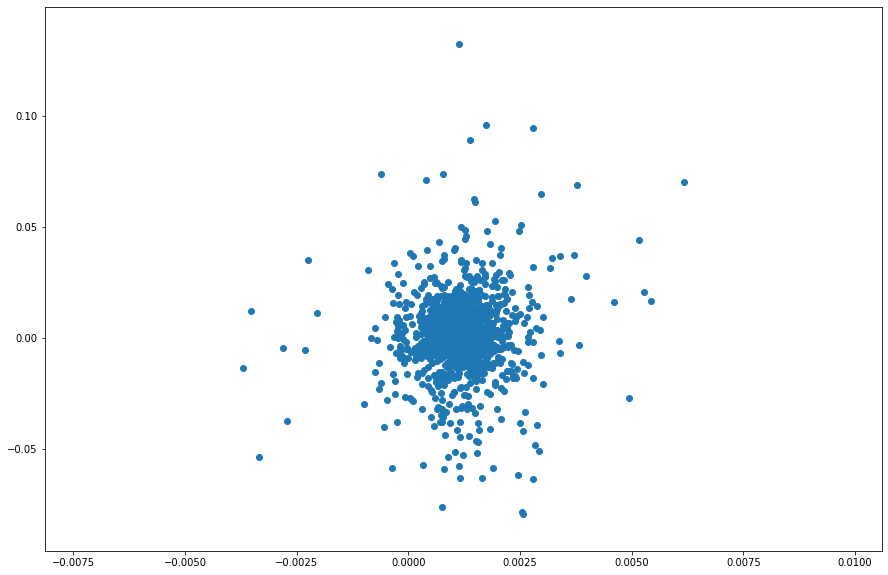

In [9]:
plt.figure(figsize=(15,10))
plt.plot(y_pred, color="teal", label="y_prediction")
plt.plot(y_visu, color="green", alpha=0.15, label = "y_value", linewidth=5)
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_visu, label="y_prediction")
plt.show()


##### Earnings

In [10]:
def earning(tx_pred, tx_visu, sb=0.00, sh=0.00, spread=0.0005):
    # Initialisation
    l = len(tx_pred)
    earning = np.zeros(l).reshape(l,1)
    
    #Earning
    for i in range(l):
        if tx_pred[i][0]>sh:
            earning[i][0] = (tx_visu[i][0])-spread
        if tx_pred[i][0]<-sb:
            earning[i][0] = (-tx_visu[i][0])-spread
    return earning

In [11]:
earning = earning(y_pred, y_visu)

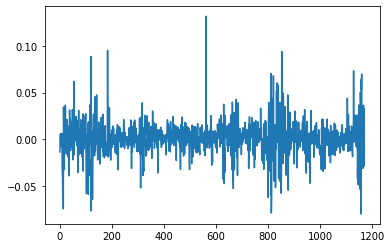

In [12]:
plt.plot(earning)

###### Statistics

In [13]:
print("Average = {} %".format(np.mean(earning[earning!=0])*100))

Average = 0.0997717370856093 %


In [14]:
print("StandardDeviation = {} %".format(np.std(earning[earning!=0])*100))

StandardDeviation = 1.858062579194208 %


In [15]:
print("SharpeRatio = {}".format(np.mean(earning[earning!=0])/np.std(earning[earning!=0])))

SharpeRatio = 0.05369665058798914


In [16]:
print("DownStandardDeviation = {} %".format(np.std(earning[earning<0])*100))

DownStandardDeviation = 1.3551404586309188 %


In [17]:
print("SoritnoRatio = {}".format(np.mean(earning[earning!=0])/np.std(earning[earning<0])))

SoritnoRatio = 0.0736246463974719


In [18]:
print("Sum = {} %".format(np.sum(earning[earning!=0])*100, 3))

Sum = 116.73293239016287 %


------------------ Initialization -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 54.02 %
Pourcentage of earnings: 116.73 %
Poucentage composed: 162.63 %
Ratio earning/trade: 0.1 %
Standard deviation of earning: 1.86 %
Sharpe ratio: 0.053697
Sortino ratio: 0.073625
                                                           
-------------------- Other Data -----------------------
Sum rise earning: 107.76 %
Sum drop earning: 8.97 %
Max rise earning: 13.17 %
Min rise earning: -7.97 %
Max drop earning: 5.82 %
Min drop earning: -7.43 %
                                                           
-------------------- Distribution -----------------------


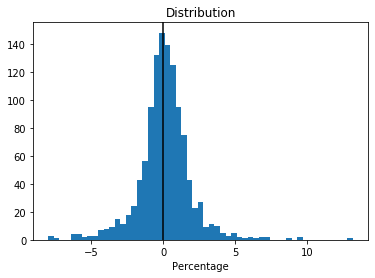

                                                           
-------------------- Growth of investment -----------------------


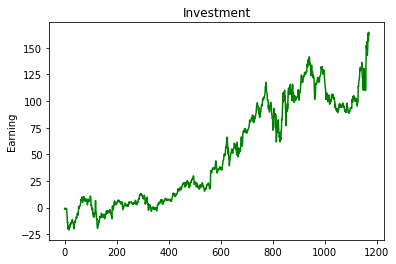

In [19]:
##### This is backtesting of the chapter 5
##### We must read the chapter 5 to undertand
from earning import*
y_pred = y_pred.reshape(len(y_pred),1)
earning(y_pred,y_visu)